# The World Happiness Report Data Analysis 2023 

## Table of Contents
#### 1.Importing Data
#### 2.Happiest and unhappiest countries in 2023 
#### 3.Region Analysis
#### 4.Correlation
#### 5. Relationship between variables and happiness 
#### 6. Conclusion

## DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from numpy import mean, std

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import geopandas
import matplotlib.colors
import pycountry 

from sqlalchemy import create_engine
import sqlite3


import warnings
warnings.filterwarnings("ignore")


## IMPORT DATA

In [2]:
conn = sqlite3.connect('Resources/HappinessIndexScore.sqlite')
#cleaned_df.to_sql('final_output', conn, if_exists='replace', index=False)

In [3]:
query = "SELECT * FROM final_output"

In [4]:
df = pd.read_sql_query(query, conn)
conn.close()


In [5]:
df.head(10)

,country,region,ladder_score,logged_GPD_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_corruption,population_density,unemployment_rate,median_age,gini_coefficient,avg_temperature,lt_alcohol_per_capita
0,Finland,Europe,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,16.60,7.16,43.2,27.7,3.24,8.23
1,Denmark,Europe,7.586,10.962,0.954,71.250,0.934,0.134,0.196,138.00,5.14,42.2,27.7,9.77,9.16
2,Iceland,Europe,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3.50,3.56,37.8,26.1,2.11,7.72
3,Israel,Middle East,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,412.24,3.39,30.1,38.6,20.23,3.07
4,Netherlands,Europe,7.403,10.942,0.930,71.550,0.887,0.213,0.379,420.38,3.56,42.2,29.2,11.72,8.23
5,Sweden,Europe,7.395,10.883,0.939,72.150,0.948,0.165,0.202,23.40,7.59,41.0,29.3,3.84,7.10
6,Norway,Europe,7.315,11.088,0.943,71.500,0.947,0.141,0.283,17.29,3.58,40.6,27.7,2.88,6.05
7,Switzerland,Europe,7.240,11.164,0.920,72.900,0.891,0.027,0.266,207.47,4.05,44.0,33.1,8.08,9.41
8,Luxembourg,Europe,7.228,11.660,0.879,71.675,0.915,0.024,0.345,255.58,5.19,39.8,34.2,11.43,11.00
9,New Zealand,Australia and Oceania,7.123,10.662,0.952,70.350,0.887,0.175,0.271,19.01,3.74,37.7,36.2,11.66,9.17


In [42]:
df.tail(10)

,region,ladder_score,logged_GPD_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_corruption,population_density,unemployment_rate,median_age,gini_coefficient,avg_temperature,lt_alcohol_per_capita,CODE
country,,,,,,,,,,,,,,,
Madagascar,Africa,4.019,7.290,0.650,58.050,0.522,0.075,0.742,49.08,3.06,21.0,42.6,22.70,0.89,MDG
Zambia,Africa,3.982,8.074,0.694,55.032,0.791,0.098,0.818,26.86,5.91,18.2,57.1,21.92,3.82,ZMB
Tanzania,Africa,3.694,7.857,0.653,59.401,0.838,0.182,0.554,69.29,2.61,18.9,40.5,22.90,7.81,None
Comoros,Africa,3.545,8.075,0.471,59.425,0.470,-0.014,0.727,397.48,5.80,22.3,45.3,23.74,0.18,COM
Malawi,Africa,3.495,7.302,0.531,58.475,0.750,0.005,0.749,179.60,5.04,20.0,38.5,22.55,2.04,MWI
Botswana,Africa,3.435,9.629,0.753,54.725,0.742,-0.215,0.830,4.16,23.38,26.8,53.3,22.00,5.98,BWA
Zimbabwe,Africa,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,39.46,8.76,21.0,50.3,21.83,3.11,ZWE
Sierra Leone,Africa,3.138,7.394,0.555,54.900,0.660,0.105,0.858,124.17,3.17,19.2,35.7,26.64,3.22,SLE
Lebanon,Middle East,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,512.62,11.57,35.8,31.8,15.66,1.14,LBN


## DATA ANALYSIS 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  123 non-null    object 
 1   region                   123 non-null    object 
 2   ladder_score             123 non-null    float64
 3   logged_GPD_per_capita    123 non-null    float64
 4   social_support           123 non-null    float64
 5   healthy_life_expectancy  123 non-null    float64
 6   freedom_life_choices     123 non-null    float64
 7   generosity               123 non-null    float64
 8   perceptions_corruption   123 non-null    float64
 9   population_density       123 non-null    float64
 10  unemployment_rate        123 non-null    float64
 11  median_age               123 non-null    float64
 12  gini_coefficient         123 non-null    float64
 13  avg_temperature          123 non-null    float64
 14  lt_alcohol_per_capita    1

In [7]:
df.describe()

,ladder_score,logged_GPD_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_corruption,population_density,unemployment_rate,median_age,gini_coefficient,avg_temperature,lt_alcohol_per_capita
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,5.567626,9.454992,0.802106,64.978610,0.793244,0.016228,0.721610,201.666667,6.263902,32.386992,37.098374,18.145122,5.139187
std,1.154393,1.198390,0.130369,5.639579,0.110367,0.135629,0.181311,762.148090,4.552422,9.456111,7.695176,8.078179,3.708704
min,1.859000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,2.080000,0.240000,15.100000,23.200000,-4.220000,0.000000
25%,4.789500,8.607000,0.724000,60.737500,0.733500,-0.077000,0.658500,33.310000,3.405000,24.250000,31.750000,11.500000,1.745000
50%,5.722000,9.567000,0.836000,65.850000,0.804000,0.000000,0.774000,79.550000,5.190000,31.700000,35.700000,20.260000,4.490000
75%,6.369500,10.441000,0.905500,69.500000,0.877000,0.109500,0.846000,144.315000,7.455000,40.850000,41.300000,25.210000,8.035000
max,7.804000,11.660000,0.983000,74.349000,0.961000,0.531000,0.929000,8310.690000,27.990000,49.500000,63.000000,29.280000,12.900000


In [10]:
df.shape

(123, 15)

In [11]:
print("There are {:,} rows ".format(df.shape[0]) + "and {} columns in our data".format(df.shape[1]))

There are 123 rows and 15 columns in our data


## HAPPIEST AND UNHAPPIEST COUNTRIES IN 2023

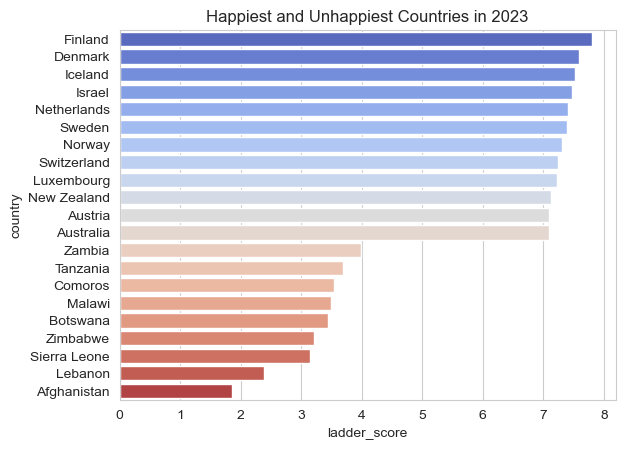

In [12]:
df_happy_unhappy_counties = df[(df.loc[:,"ladder_score"] > 7) | (df.loc[:,"ladder_score"] < 4)]
sns.barplot(x = "ladder_score", y = "country", data=df_happy_unhappy_counties, palette = "coolwarm")
plt.title("Happiest and Unhappiest Countries in 2023")
plt.show()

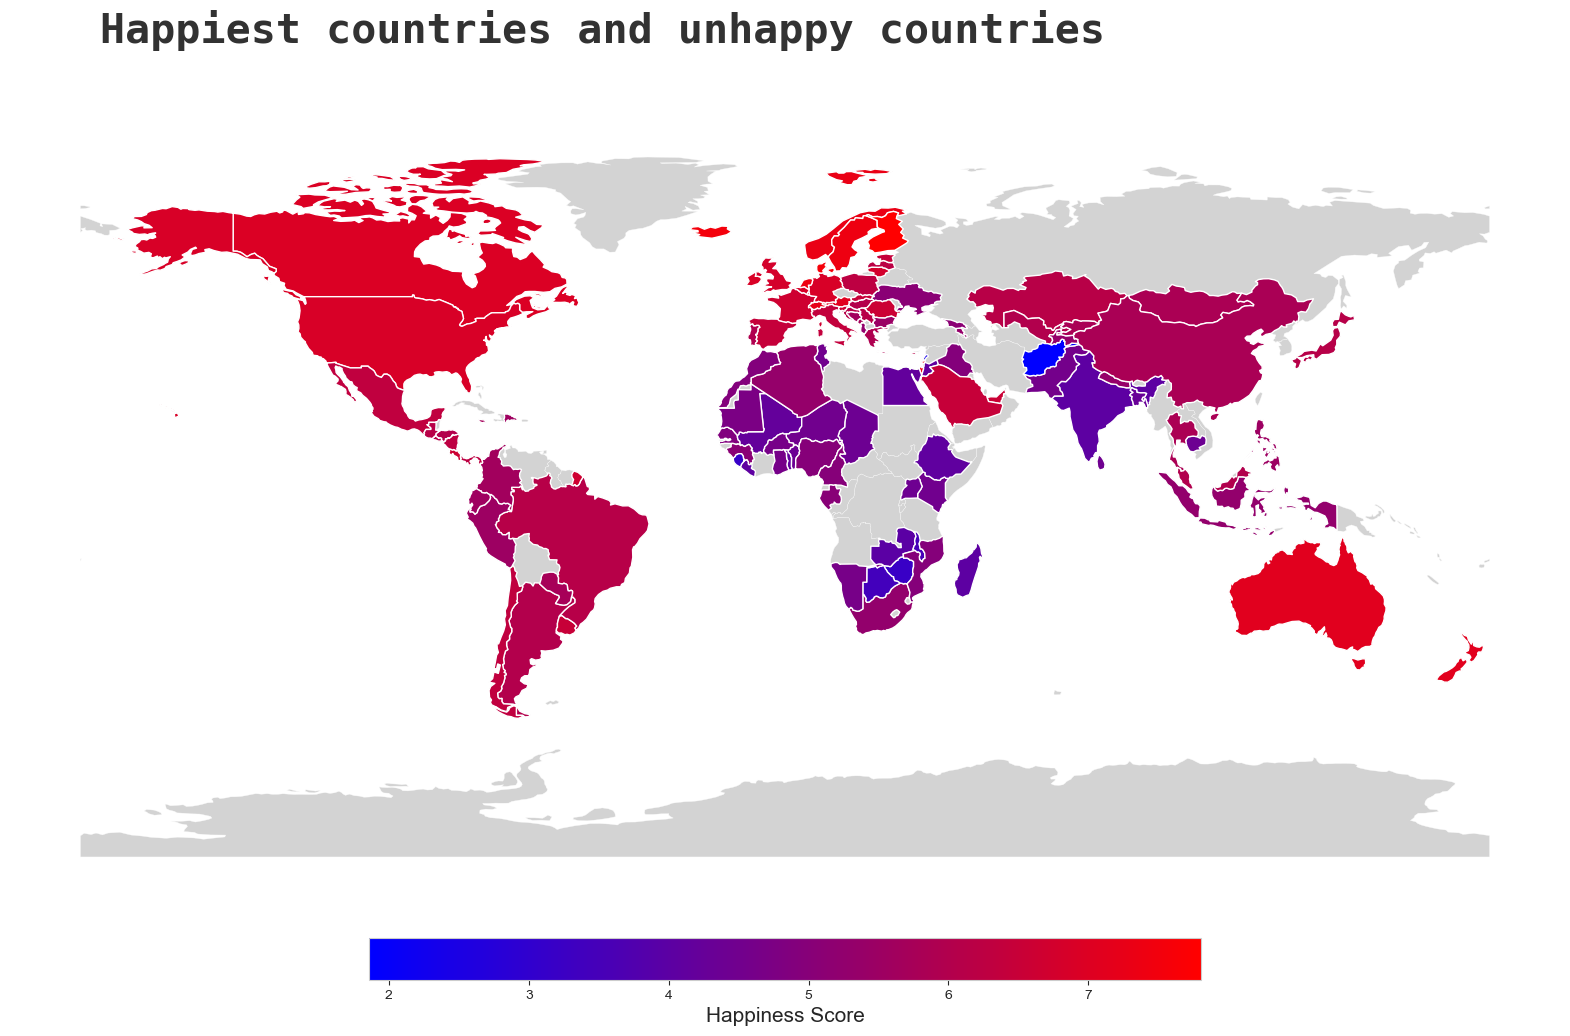

In [13]:
#Create a map 
geo_temp = df


def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
geo_temp['CODE']=alpha3code(geo_temp['country'])


world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
merge=pd.merge(world,geo_temp,on='CODE')



background = "#fbfbfb"


high_c = 'red'
low_c = 'blue'


cmap = [low_c,high_c]


# Custom colour map
# Create a linear colormap 
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [low_c, high_c])

ax = world.plot(figsize=(20,15), linewidth=0.25, edgecolor=background, color='lightgray')
ax.axis('off')
ax.set_facecolor(background)
merge.plot(column='ladder_score',figsize=(20, 15),legend=False,cmap=cmap,ax=ax)

# Setting up the color bar for the legend 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=merge['ladder_score'].min(), vmax=merge['ladder_score'].max()))
sm._A = [] # Empty array for the data range
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.04)
cbar.set_label('Happiness Score', size=15)


ax.text(-175,112,'Happiest countries and unhappy countries',fontsize=30,fontweight='bold',fontfamily='monospace',color='#323232')


plt.show()


In [15]:
fig = px.scatter(df, 
                 x = "logged_GPD_per_capita",
                 y = "ladder_score",
                 animation_group = "country",
                 size = "population_density",
                 template = "plotly_white",
                 color = "region", 
                 hover_name = "country", 
                 size_max = 60)
fig.update_layout(title = "Happiness score and Log GDP per capita Comparison by Countries via Regions in 2023")
fig.show()



In [16]:
df.set_index('country', inplace=True)

In [17]:
df.isnull().sum()

region                     0
ladder_score               0
logged_GPD_per_capita      0
social_support             0
healthy_life_expectancy    0
freedom_life_choices       0
generosity                 0
perceptions_corruption     0
population_density         0
unemployment_rate          0
median_age                 0
gini_coefficient           0
avg_temperature            0
lt_alcohol_per_capita      0
CODE                       0
dtype: int64

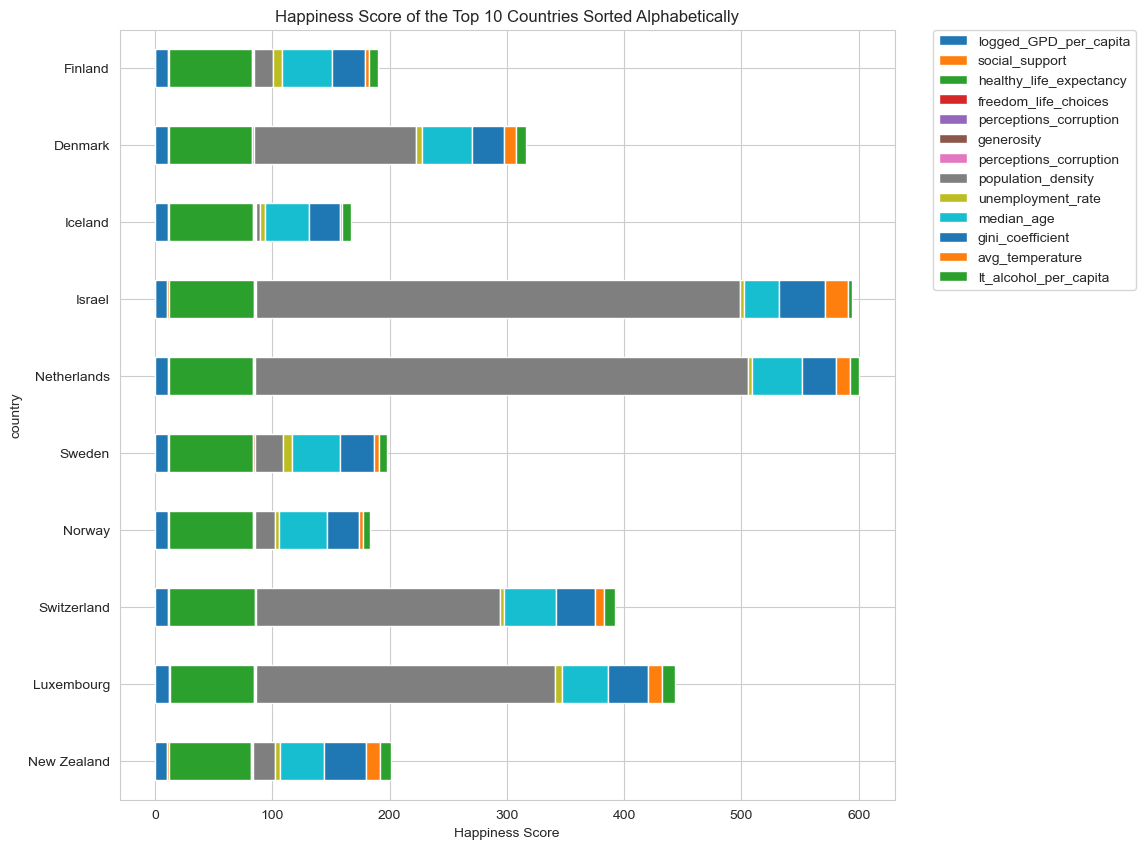

In [92]:
top_10_sorted = df[['logged_GPD_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_life_choices', 'perceptions_corruption', 'generosity', 'perceptions_corruption', 'population_density', 'unemployment_rate', 'median_age', 'gini_coefficient', 'avg_temperature', 'lt_alcohol_per_capita']].head(10)

# Reverse the DataFrame to display in ascending order in the plot 
top_10_sorted = top_10_sorted.iloc[::-1]

# Plotting the sorted data 
top_10_sorted.plot(kind='barh', stacked=True, figsize=(10, 10))
plt.xlabel("Happiness Score") 
plt.title('Happiness Score of the Top 10 Countries Sorted Alphabetically') 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

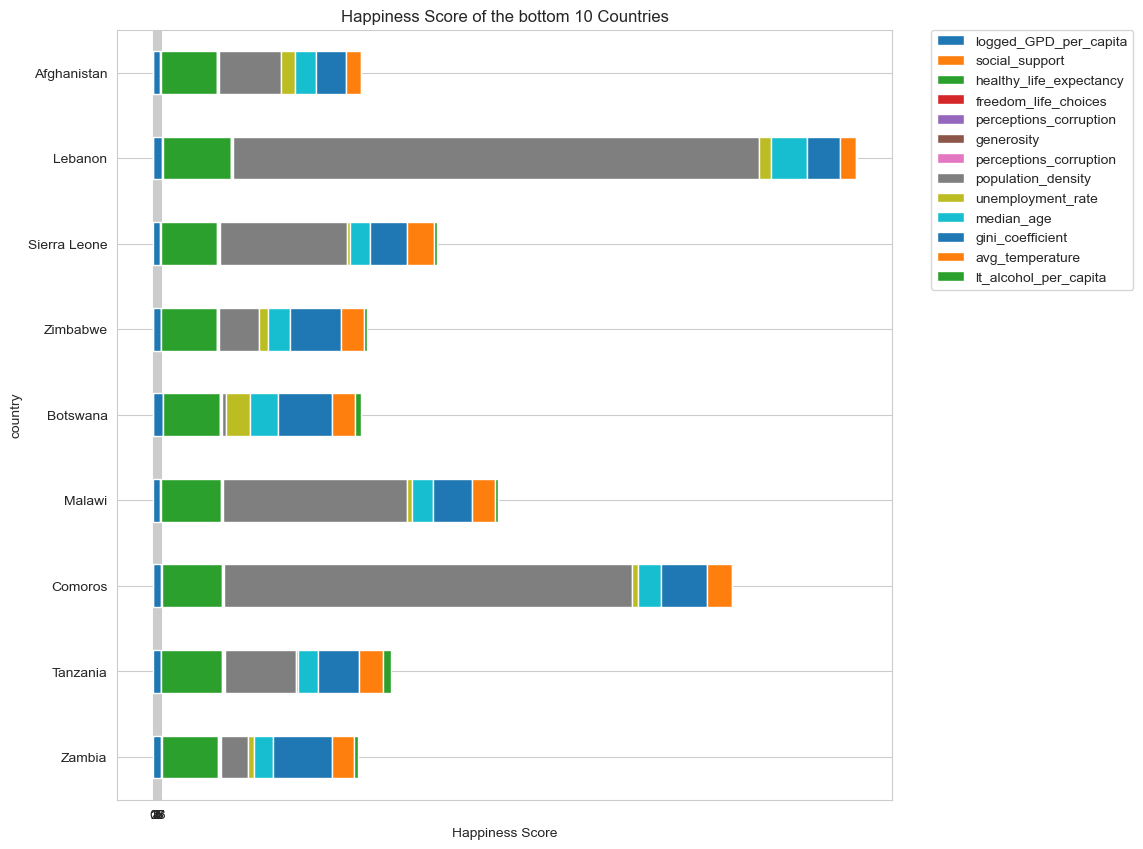

In [19]:
df_unhappy_counties = df[df.loc[:,"ladder_score"] < 4]
df_unhappy_counties[['logged_GPD_per_capita','social_support','healthy_life_expectancy', 'freedom_life_choices', 'perceptions_corruption', 'generosity', 'perceptions_corruption', 'population_density','unemployment_rate','median_age','gini_coefficient','avg_temperature','lt_alcohol_per_capita']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the bottom 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## REGION ANALYSIS

In [20]:
Region_df = df.groupby('region')

In [21]:
df[df['region']==  "Europe"].head(5)

,region,ladder_score,logged_GPD_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_corruption,population_density,unemployment_rate,median_age,gini_coefficient,avg_temperature,lt_alcohol_per_capita,CODE
country,,,,,,,,,,,,,,,
Finland,Europe,7.804,10.792,0.969,71.15,0.961,-0.019,0.182,16.60,7.16,43.2,27.7,3.24,8.23,FIN
Denmark,Europe,7.586,10.962,0.954,71.25,0.934,0.134,0.196,138.00,5.14,42.2,27.7,9.77,9.16,DNK
Iceland,Europe,7.530,10.896,0.983,72.05,0.936,0.211,0.668,3.50,3.56,37.8,26.1,2.11,7.72,ISL
Netherlands,Europe,7.403,10.942,0.930,71.55,0.887,0.213,0.379,420.38,3.56,42.2,29.2,11.72,8.23,NLD
Sweden,Europe,7.395,10.883,0.939,72.15,0.948,0.165,0.202,23.40,7.59,41.0,29.3,3.84,7.10,SWE


In [22]:
df[df['region']==  "North America"].head(5)

,region,ladder_score,logged_GPD_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_corruption,population_density,unemployment_rate,median_age,gini_coefficient,avg_temperature,lt_alcohol_per_capita,CODE
country,,,,,,,,,,,,,,,
Canada,North America,6.961,10.773,0.929,71.40,0.874,0.153,0.420,3.86,5.37,42.4,33.3,-4.22,8.00,CAN
United States,North America,6.894,11.048,0.919,65.85,0.800,0.137,0.689,34.54,3.63,38.5,41.5,9.73,8.93,USA
Mexico,North America,6.330,9.850,0.804,65.80,0.856,-0.094,0.768,66.12,2.81,30.6,45.4,21.70,4.25,MEX


In [23]:
Region_df['ladder_score'].describe().sort_values(by="mean",ascending=True).head(10)


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
South Asia,6.0,4.089000,1.180692,1.859,4.09750,4.362,4.52675,5.360
Africa,33.0,4.415606,0.641272,3.138,4.04200,4.487,4.90300,5.902
Middle East,9.0,5.254111,1.494438,2.392,4.87600,5.109,6.46300,7.473
East and Southeast Asia,11.0,5.663273,0.581093,4.393,5.40000,5.818,5.92750,6.587
Central Asia,5.0,5.794800,0.318136,5.330,5.66100,5.825,6.01400,6.144
South America,10.0,5.832500,0.399765,5.211,5.57675,5.711,6.09975,6.494
Central America and the Caribbean,8.0,6.087500,0.329246,5.569,5.94300,6.136,6.26050,6.609
Europe,36.0,6.516222,0.679410,5.071,6.10400,6.462,6.95750,7.804
North America,3.0,6.728333,0.346590,6.330,6.61200,6.894,6.92750,6.961


In [24]:
R_Africa = df[df["region"] == "Africa"]
R_Europe = df[df['region'] == 'Europe']
R_NAmerica = df[df['region'] == 'North America']
R_SAmerica = df[df['region'] == 'South America']
R_CAmerica = df[df['region'] == 'Central America and the Carinnean']
R_Australia = df[df['region'] == 'Australia and Oceania']
R_MiddleE = df[df['region'] == 'Middle East']
R_SouthAsia = df[df['region'] == 'South Asia']
R_EastAsia = df[df['region'] == 'East and Southeast Asia']
R_CentralAsia = df[df['region'] == 'Central Asia']




In [25]:
len(R_Africa[R_Africa['ladder_score'] > 6])
print("There are {} countries in Africa that have a happiness score above 6.0 ".format(len(R_Africa[R_Africa['ladder_score'] > 6])))

There are 0 countries in Africa that have a happiness score above 6.0 


In [44]:
len(R_Europe[R_Europe['ladder_score'] > 6])
print("There are {} countries in Europe that have a happiness score above 6.0 ".format(len(R_Europe[R_Europe['ladder_score'] > 6])))

There are 28 countries in Europe that have a happiness score above 6.0 


In [26]:
len(R_NAmerica[R_NAmerica['ladder_score'] > 6])
print("There are {} countries in North America that have a happiness score above 6.0 ".format(len(R_NAmerica[R_NAmerica['ladder_score'] > 6])))

There are 3 countries in North America that have a happiness score above 6.0 


In [27]:
len(R_SAmerica[R_SAmerica['ladder_score'] > 6])
print("There are {} countries in Sorth America that have a happiness score above 6.0 ".format(len(R_SAmerica[R_SAmerica['ladder_score'] > 6])))

There are 4 countries in Sorth America that have a happiness score above 6.0 


In [28]:
len(R_CAmerica[R_CAmerica['ladder_score'] > 6])
print("There are {} countries in Central America and Carrabians that have a happiness score above 6.0 ".format(len(R_CAmerica[R_CAmerica['ladder_score'] > 6])))

There are 0 countries in Central America and Carrabians that have a happiness score above 6.0 


In [29]:
len(R_Australia[R_Australia['ladder_score'] > 6])
print("There are {} countries in Australia and Oceania that have a happiness score above 6.0 ".format(len(R_Australia[R_Australia['ladder_score'] > 6])))

There are 2 countries in Australia and Oceania that have a happiness score above 6.0 


In [30]:
len(R_MiddleE[R_MiddleE['ladder_score'] > 6])
print("There are {} countries in Middle East that have a happiness score above 6.0 ".format(len(R_MiddleE[R_MiddleE['ladder_score'] > 6])))

There are 3 countries in Middle East that have a happiness score above 6.0 


In [31]:
len(R_CentralAsia[R_CentralAsia['ladder_score'] > 6])
print("There are {} countries in Central Asia that have a happiness score above 6.0 ".format(len(R_CentralAsia[R_CentralAsia['ladder_score'] > 6])))

There are 2 countries in Central Asia that have a happiness score above 6.0 


In [32]:
len(R_SouthAsia[R_SouthAsia['ladder_score'] > 6])
print("There are {} countries in South Asia that have a happiness score above 6.0 ".format(len(R_SouthAsia[R_SouthAsia['ladder_score'] > 6])))

There are 0 countries in South Asia that have a happiness score above 6.0 


In [33]:
len(R_EastAsia[R_EastAsia['ladder_score'] > 6])
print("There are {} countries in East Asia that have a happiness score above 6.0 ".format(len(R_EastAsia[R_EastAsia['ladder_score'] > 6])))

There are 3 countries in East Asia that have a happiness score above 6.0 


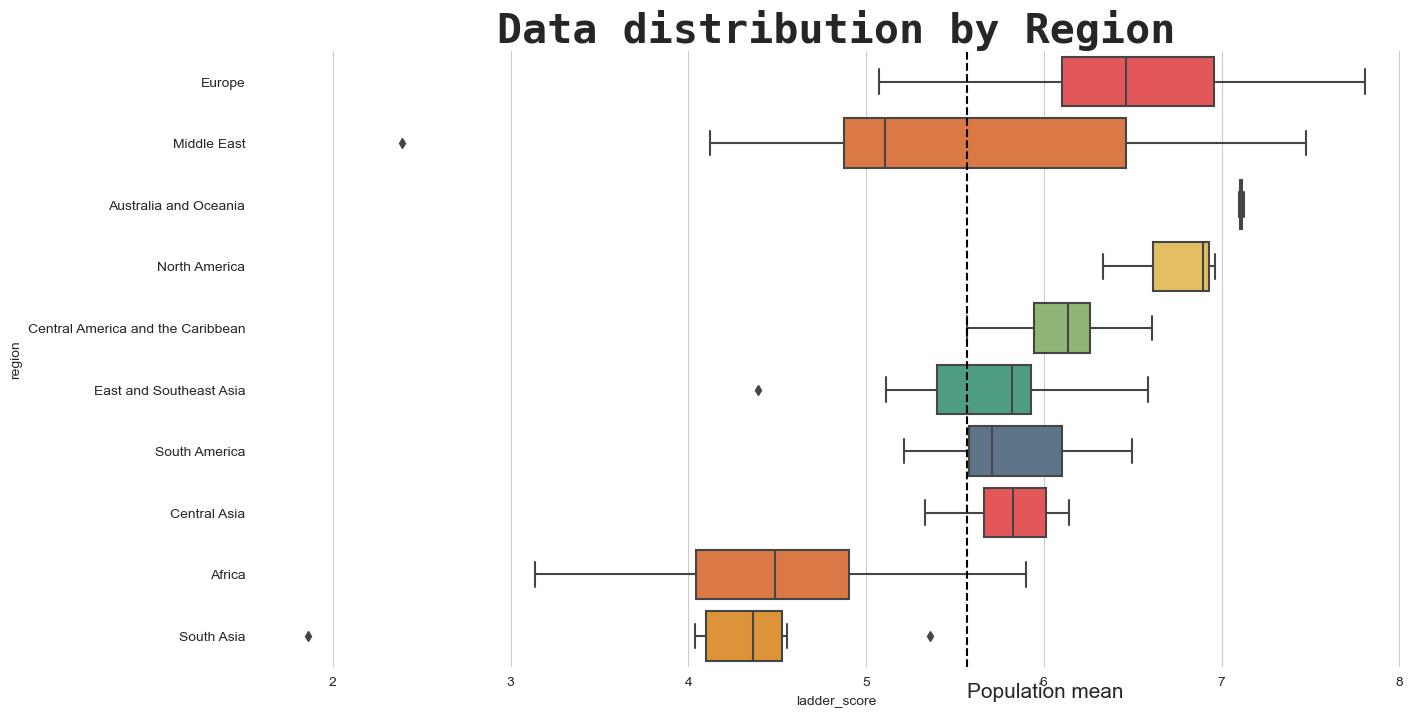

In [34]:
# Data distribution by the Region
color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]

fig=plt.figure(figsize=(15,8))
plt.title("Data distribution by Region",family='monospace', weight='bold', size=30)
sns.boxplot(x=df['ladder_score'],y=df['region'], palette=color)
plt.axvline(df['ladder_score'].mean(), c='black',ls='--')
plt.text(x=df['ladder_score'].mean(),y=10,s='Population mean', size=15)
for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)

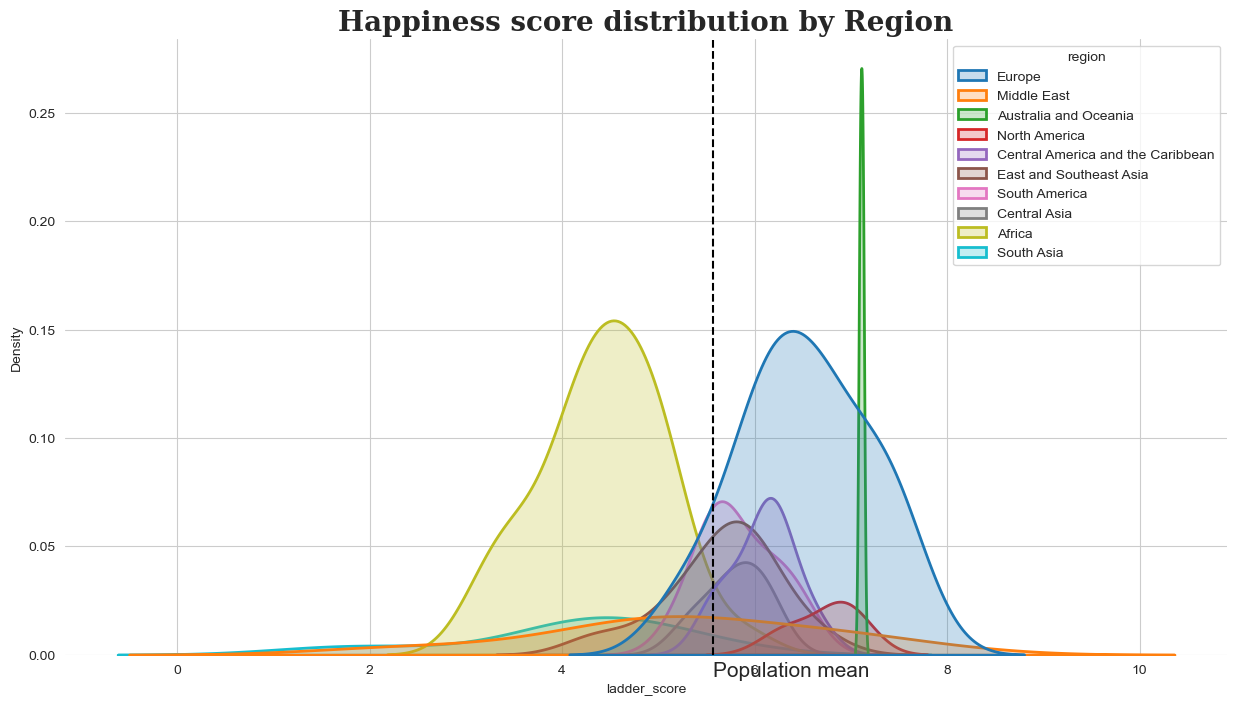

In [93]:
#Happiness score distribution by Region

fig=plt.figure(figsize=(15,8))
plt.title("Happiness score distribution by Region",family='Serif', weight='bold', size=20)
sns.kdeplot(data=df, x='ladder_score',fill=True,hue=df['region'], color=color, shade=True, linewidth=2, multiple='layer')
plt.axvline(df['ladder_score'].mean(), c='black',ls='--')
plt.text(x=df['ladder_score'].mean(),y=-0.01,s='Population mean', size=15)
for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)
plt.show()

## CORRALATION

In [102]:
import plotly.express as px 
import pandas as pd 
def plot_corr_heatmap_plotly(df, title="Correlation Matrix Heatmap"): 
    numeric_df = df.select_dtypes(include=[float, int])
    corr_matrix = numeric_df.corr() 
    fig = px.imshow(corr_matrix, text_auto=".2f",  labels=dict(x="Variables", y="Variables", color="Correlation"), x=numeric_df.columns, y=numeric_df.columns, title=title, color_continuous_scale='RdBu_r') 
    fig.update_layout( autosize=False, width=1500, height = 800,  margin=dict(l=20, r=20, t=50, b=20) )
    fig.update_traces(textfont_size=8)
    fig.show()
    

plot_corr_heatmap_plotly(df, "Correlation Matrix Heatmap for 2023")

In [106]:
!pip install -U kaleido
import plotly.express as px 
import pandas as pd 

numeric_df = df.select_dtypes(include=[float, int])
corr_matrix = numeric_df.corr() 
fig = px.imshow(corr_matrix, text_auto=".2f",  labels=dict(x="Variables", y="Variables", color="Correlation"), x=numeric_df.columns, y=numeric_df.columns, title="Correlation Matrix Heatmap for 2023", color_continuous_scale='RdBu_r') 
fig.update_layout( autosize=False, width=1500, height = 800,  margin=dict(l=20, r=20, t=50, b=20) )
fig.update_traces(textfont_size=8)
#plt.savefig("image2.png")
fig.show()


## RELATIONSHIP BETWEEN MAIN VARIABLES AND HAPPINESS

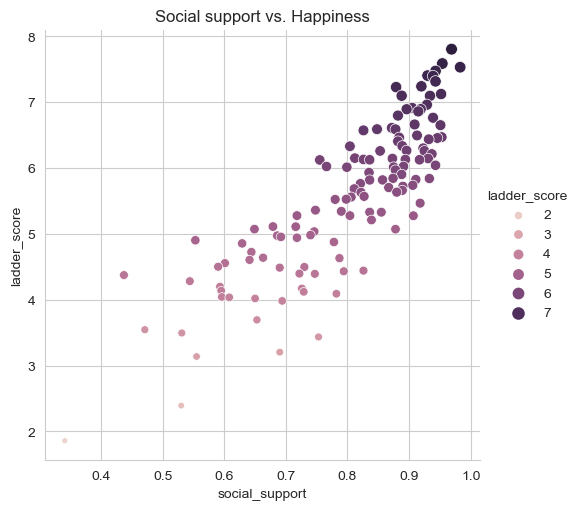

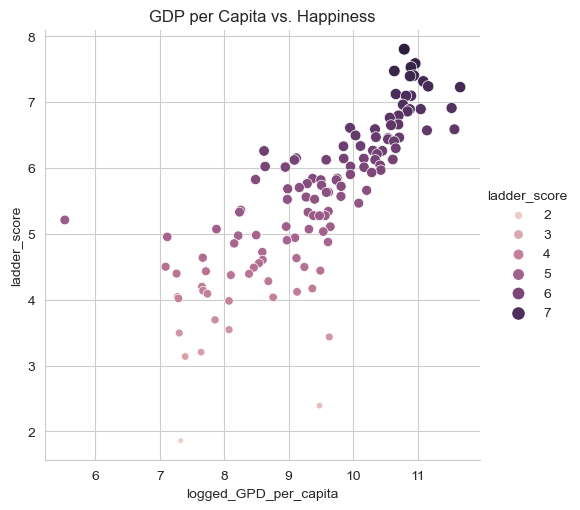

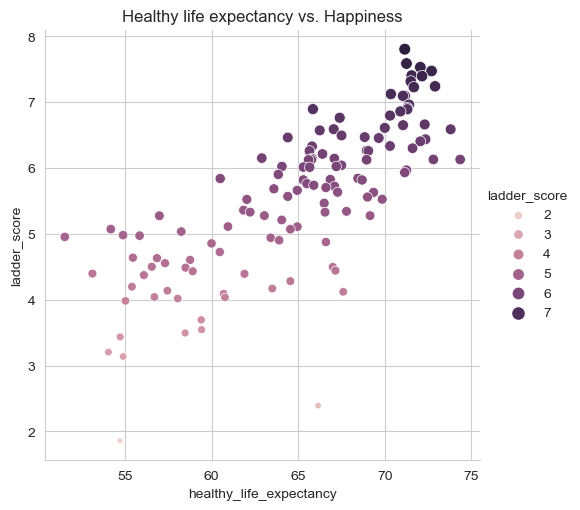

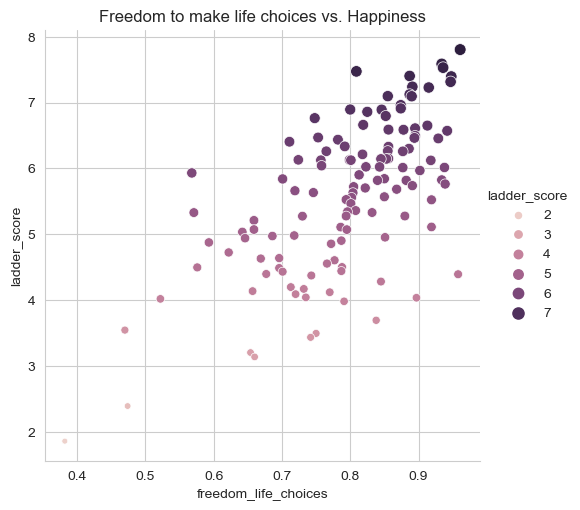

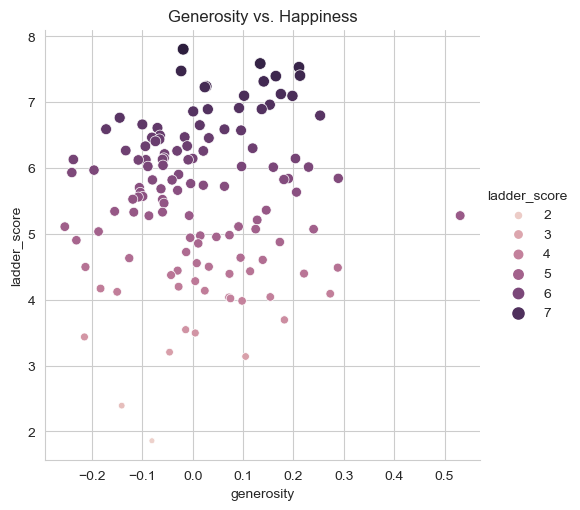

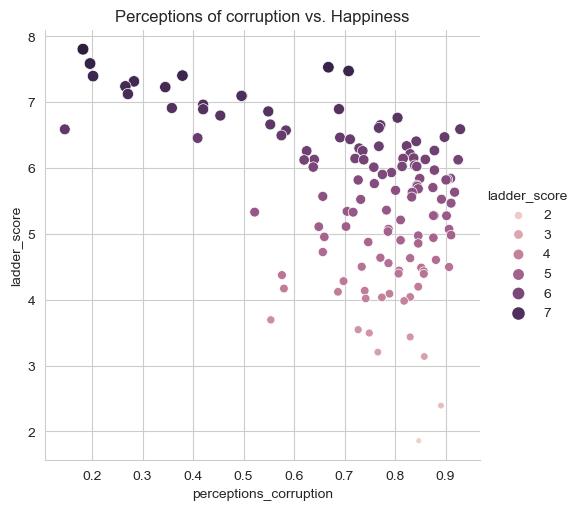

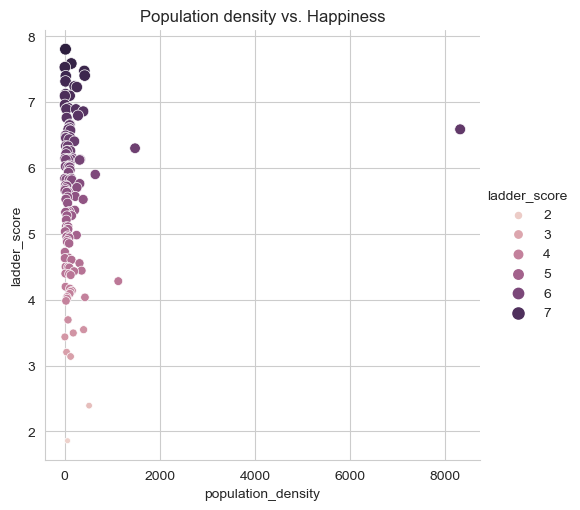

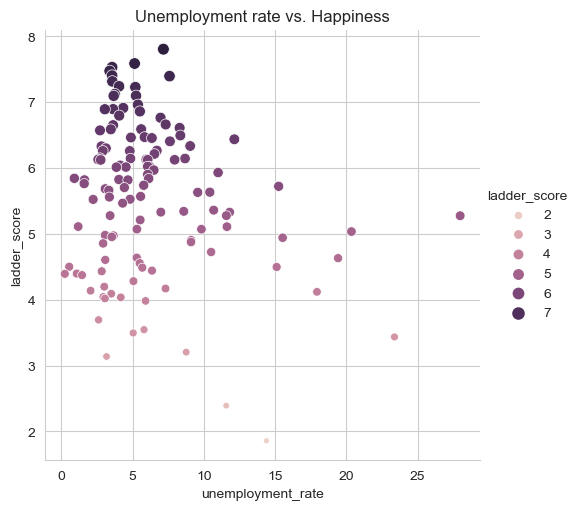

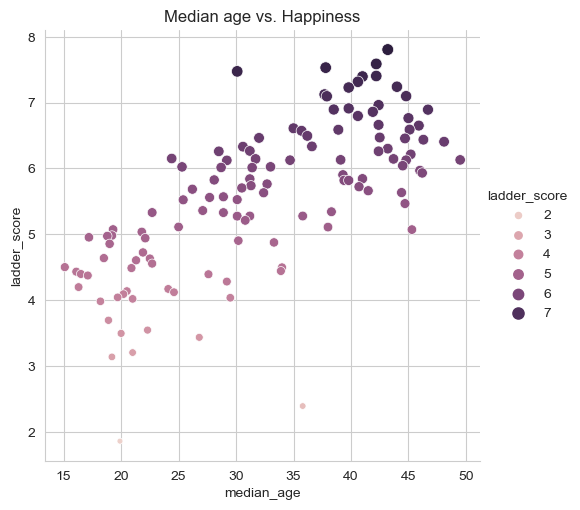

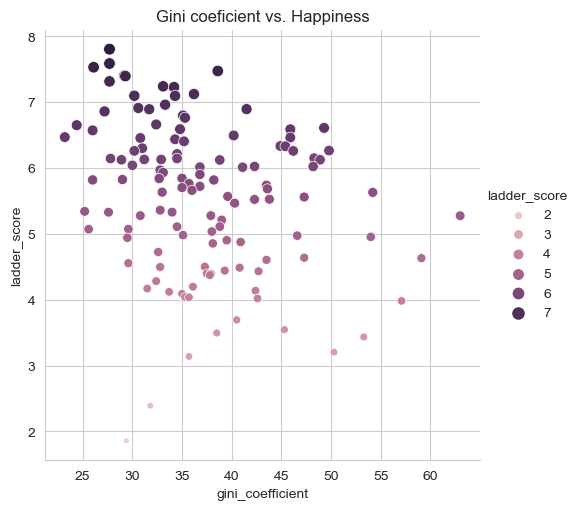

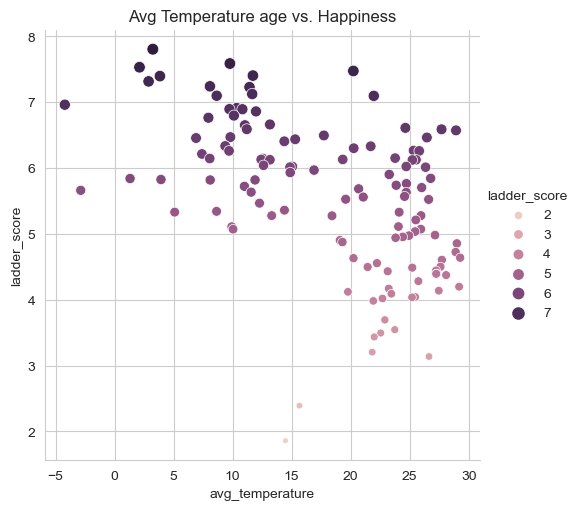

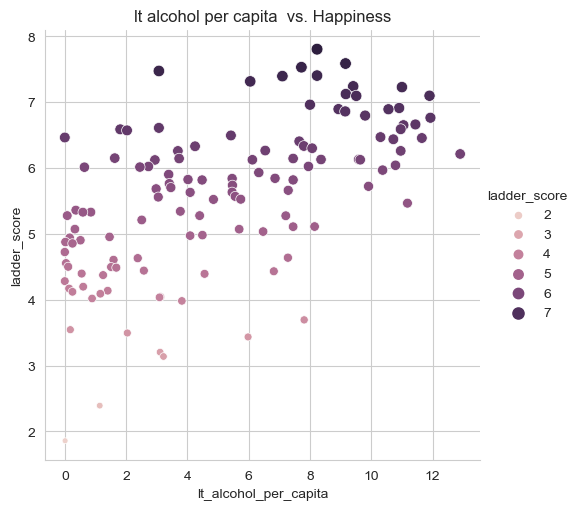

In [104]:
sns.set_style('whitegrid')
sns.relplot(x='social_support', y='ladder_score', data=df, kind='scatter', size='ladder_score', hue='ladder_score').set(title='Social support vs. Happiness')
plt.show()

sns.set_style('whitegrid')
sns.relplot(x='logged_GPD_per_capita', y='ladder_score', data=df, kind='scatter', size='ladder_score', hue='ladder_score').set(title='GDP per Capita vs. Happiness')
plt.show()

sns.set_style('whitegrid')
sns.relplot(x='healthy_life_expectancy', y='ladder_score', data=df, kind='scatter', size='ladder_score', hue='ladder_score').set(title='Healthy life expectancy vs. Happiness')
plt.show()

sns.set_style('whitegrid')
sns.relplot(x='freedom_life_choices', y='ladder_score', data=df, kind='scatter', size='ladder_score', hue='ladder_score').set(title='Freedom to make life choices vs. Happiness')
plt.show()

sns.set_style('whitegrid')
sns.relplot(x='generosity', y='ladder_score', data=df, kind='scatter', size='ladder_score', hue='ladder_score').set(title='Generosity vs. Happiness')
plt.show()

sns.set_style('whitegrid')
sns.relplot(x='perceptions_corruption', y='ladder_score', data=df, kind='scatter', size='ladder_score', hue='ladder_score').set(title='Perceptions of corruption vs. Happiness')
plt.show()

sns.set_style('whitegrid')
sns.relplot(x='population_density', y='ladder_score', data=df, kind='scatter', size='ladder_score', hue='ladder_score').set(title='Population density vs. Happiness')
plt.show()

sns.set_style('whitegrid')
sns.relplot(x='unemployment_rate', y='ladder_score', data=df, kind='scatter', size='ladder_score', hue='ladder_score').set(title='Unemployment rate vs. Happiness')
plt.show()

sns.set_style('whitegrid')
sns.relplot(x='median_age', y='ladder_score', data=df, kind='scatter', size='ladder_score', hue='ladder_score').set(title='Median age vs. Happiness')
plt.show()

sns.set_style('whitegrid')
sns.relplot(x='gini_coefficient', y='ladder_score', data=df, kind='scatter', size='ladder_score', hue='ladder_score').set(title='Gini coeficient vs. Happiness')
plt.show()

sns.set_style('whitegrid')
sns.relplot(x='avg_temperature', y='ladder_score', data=df, kind='scatter', size='ladder_score', hue='ladder_score').set(title='Avg Temperature age vs. Happiness')
plt.show()

sns.set_style('whitegrid')
sns.relplot(x='lt_alcohol_per_capita', y='ladder_score', data=df, kind='scatter', size='ladder_score', hue='ladder_score').set(title='lt alcohol per capita  vs. Happiness')
plt.show()


## CONCLUSION

#### We see that there are many clear distinctions between happy and unhappy countries.

#### Happier countries tend to: be wealthier, have a lot of social support, healthy life expectancy, be more free, be less corrupt, older. 

#### Also, all those finding can come as a result of being wealthy. 

#### Looking by the Regions, Europe has 28 countries that have a happiness score above 6.0, North America 3 countries, Australia and Oceania 2 countries, South America 4 countries, Middle East 3 countries, East Asia 3 countries. Central Asia 2, while Africa, Central America and Carrabians, South Asia don't have countries with a happiness score above 6.0.